In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Input

2022-11-21 05:46:53.515274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /app/lib
2022-11-21 05:46:53.515299: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data

In [2]:
folders = ['Rough','UTS','Elon']
index = 2
CASE = folders[index]

In [3]:
from prepross import importAndProcess
xtrain,xval,xtest,ytrain,yval,ytest = importAndProcess(index)
x = pd.concat((xtrain,xtest,xval),axis=0)
y = pd.concat((ytrain,ytest,yval),axis=0)

In [4]:
# Kernel Init
model = Sequential()
model.add(Input(shape=(len(xtrain.columns))))
model.add(Dense(units=3,
                kernel_initializer='glorot_normal',
                bias_initializer='glorot_normal',
                activation='tanh')) 
model.add(Dense(units=19,
                kernel_initializer='glorot_normal',
                bias_initializer='glorot_normal',
                activation='tanh'))
model.add(Dense(units=1,
                kernel_initializer='glorot_normal',
                bias_initializer='glorot_normal',
                activation='linear'))

2022-11-21 05:46:55.421852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /app/lib
2022-11-21 05:46:55.421911: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-21 05:46:55.421948: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: hydra
2022-11-21 05:46:55.421960: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: hydra
2022-11-21 05:46:55.422090: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2022-11-21 05:46:55.422153: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.56.6
2022-11-21 05:46:55.422446: I tensorflow/core/platform/cpu_feature_guard.

In [5]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=5e-2,beta_1=0.9,beta_2=0.999),
              loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error',tf.keras.losses.MeanAbsolutePercentageError()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dense_1 (Dense)             (None, 19)                76        
                                                                 
 dense_2 (Dense)             (None, 1)                 20        
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 18ms/step


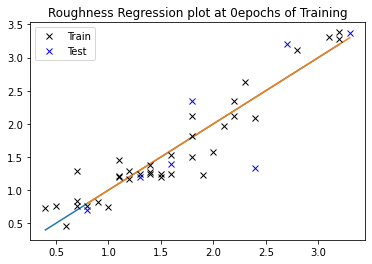

1/1 [==============================] - 0s 20ms/step


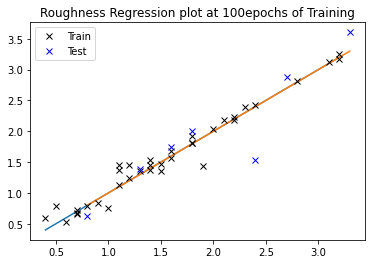

1/1 [==============================] - 0s 20ms/step


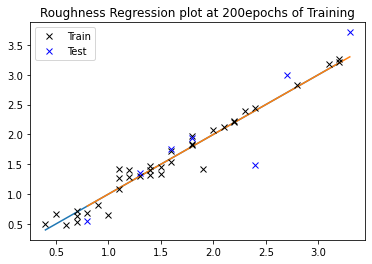

1/1 [==============================] - 0s 17ms/step


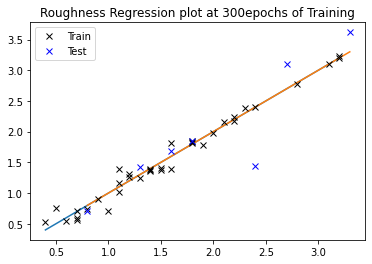

1/1 [==============================] - 0s 19ms/step


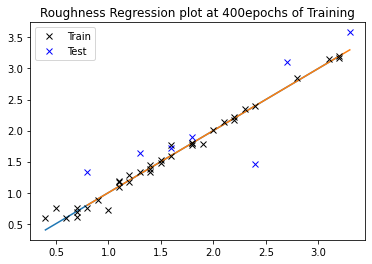

1/1 [==============================] - 0s 18ms/step


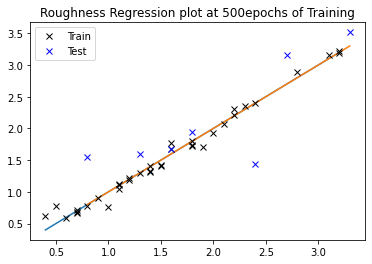

1/1 [==============================] - 0s 19ms/step


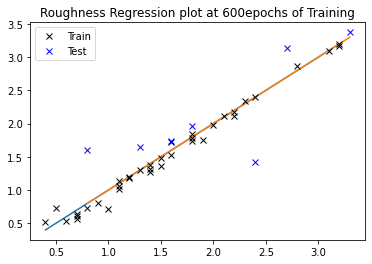

1/1 [==============================] - 0s 19ms/step


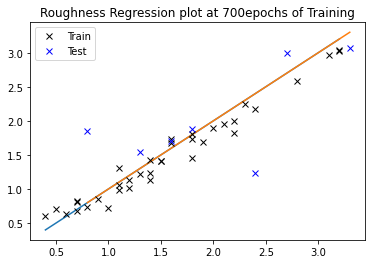

1/1 [==============================] - 0s 19ms/step


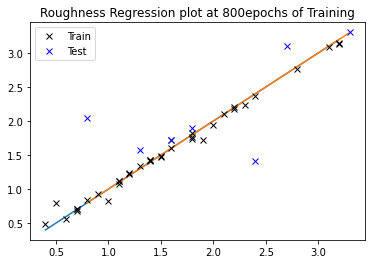

1/1 [==============================] - 0s 18ms/step


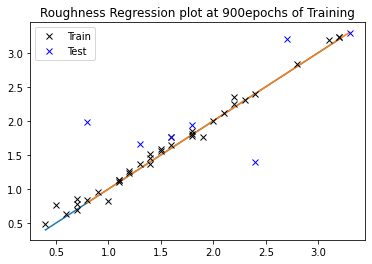

In [6]:
for i in range(10):
    if 'history' in globals():
        history = model.fit(xtrain, ytrain,epochs=history.epoch[-1]+100, verbose=0,batch_size =10,initial_epoch=history.epoch[-1])
    else:
        history = model.fit(xtrain, ytrain,epochs=100, verbose=0,batch_size =5) 
    per =  model.evaluate(xtrain,ytrain,verbose=1)
    per =  model.evaluate(xtest,ytest,verbose=1)
    ypredtr =  model.predict(xtrain).squeeze()
    ypredte =  model.predict(xtest).squeeze()
    plt.plot(ytrain,ytrain)
    plt.plot(ytest,ytest)
    plt.plot(ytrain,ypredtr,'kx',label='Train')
    plt.plot(ytest,ypredte,'bx',label='Test') 
    plt.legend()
    plt.title('Roughness Regression plot at ' + str(i*100) + 'epochs of Training')
    plt.show()

In [7]:
# No Kernel Init
model2 = Sequential()
model2.add(Input(shape=(len(xtrain.columns))))
model2.add(Dense(units=3,                 
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                activation='tanh')) #Dense: enonete me ola ta proigoumena "neurons"
model2.add(Dense(units=19,                 
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                activation='tanh'))
model2.add(Dense(units=1,                 
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                activation='linear'))

model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=5e-2,beta_1=0.9,beta_2=0.999),
              loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error',tf.keras.losses.MeanAbsolutePercentageError()])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 24        
                                                                 
 dense_4 (Dense)             (None, 19)                76        
                                                                 
 dense_5 (Dense)             (None, 1)                 20        
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 20ms/step


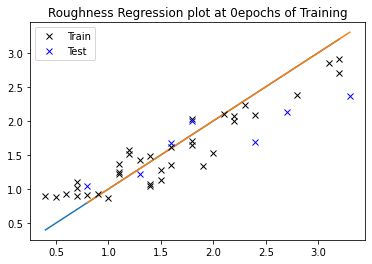

1/1 [==============================] - 0s 20ms/step


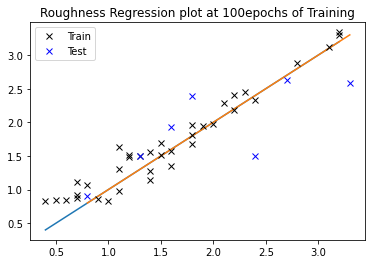

1/1 [==============================] - 0s 18ms/step


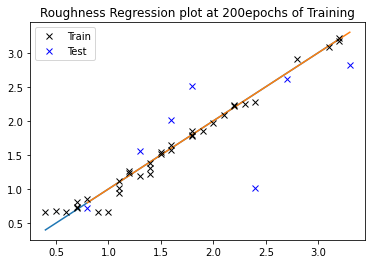

1/1 [==============================] - 0s 17ms/step


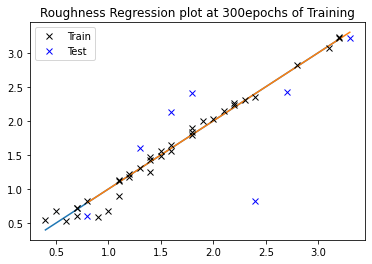

1/1 [==============================] - 0s 23ms/step


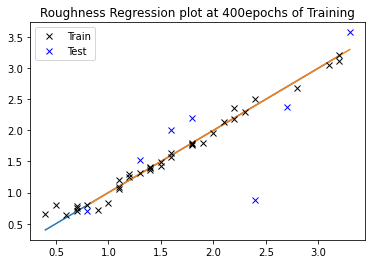

1/1 [==============================] - 0s 20ms/step


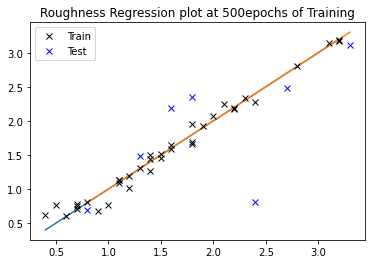

1/1 [==============================] - 0s 17ms/step


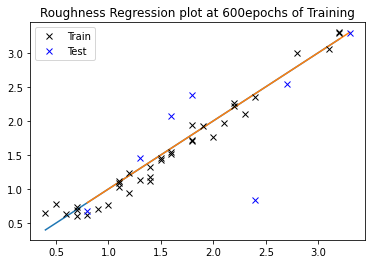

1/1 [==============================] - 0s 18ms/step


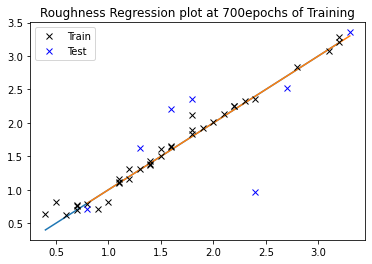

1/1 [==============================] - 0s 22ms/step


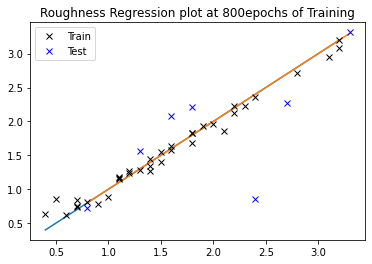

1/1 [==============================] - 0s 25ms/step


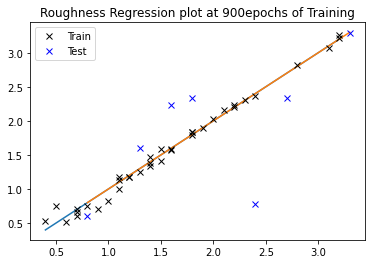

In [8]:
for i in range(10):
    if 'history' in globals():
        history = model2.fit(xtrain, ytrain,epochs=history.epoch[-1]+100, verbose=0,batch_size =10,initial_epoch=history.epoch[-1])
    else:
        history = model2.fit(xtrain, ytrain,epochs=100, verbose=0,batch_size =5) 
    per =  model2.evaluate(xtrain,ytrain,verbose=1)
    per =  model2.evaluate(xtest,ytest,verbose=1)
    ypredtr =  model2.predict(xtrain).squeeze()
    ypredte =  model2.predict(xtest).squeeze()
    plt.plot(ytrain,ytrain)
    plt.plot(ytest,ytest)
    plt.plot(ytrain,ypredtr,'kx',label='Train')
    plt.plot(ytest,ypredte,'bx',label='Test') 
    plt.legend()
    plt.title('Roughness Regression plot at ' + str(i*100) + 'epochs of Training')
    plt.show()